In [1]:
import numpy as np
import pandas as pd

In [2]:
# Delete the 4th column before you run this
df = pd.read_csv("./ManualSentimentClassifier/train.pred.csv", engine="python", header=None)
df

,0,1,2
0,It was clear right from the beginning that 9/...,positive,positive
1,The most hillarious and funny Brooks movie I ...,positive,positive
2,Along with Fernando Fragata JoÃ£o MÃ¡rio Gril...,positive,positive
3,The original Vampires (1998) is one of my fav...,positive,positive
4,The Matador stars Pierce Brosnan as a burned ...,positive,positive
...,...,...,...
1995,Lifetime did it again. Can we say stupid? I c...,negative,negative
1996,OK first of all Steve Irwin rest in peace. Yo...,negative,positive
1997,If you want to know the real story of the Wen...,negative,negative
1998,I've just had the evidence that confirmed my ...,negative,negative


In [3]:
words = []

for idx, row in df.iterrows():
    review_words = row[0].split()
    for word in review_words:
        words.append(word)
#         print(word)
#     if idx >= 50:
#         break
words.insert(0,'Positive?')
len(words)

459402

In [4]:
# Code to remove duplicate words:
# seen = set()
# seen_add = seen.add
# words = [x for x in words if not (x in seen or seen_add(x))]

In [5]:
UniqueWords = list(set(words))
AllWords = np.zeros((df.shape[0],len(UniqueWords)),dtype=int)

for index, row in df.iterrows():
#     print(index)
    if row[1] == "positive":
        AllWords[index][0] = 1
    for word in row[0].split():
        AllWords[index][UniqueWords.index(word)]=AllWords[index][UniqueWords.index(word)]+1
#     if index >= 200: 
#         break
        
AllWords

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
df = pd.DataFrame(AllWords, columns = set(words))
df
#df.to_csv("outcsv.csv", sep='\t', encoding='utf-8',index=False)

,BCI,s.th.,Carnosaur,Yikes.,concentrating,cruise,forgiveness,symptoms,Rachel,WOULD,...,Nosferatu,least;,putrid,sacrifice.,dump.,sh*t.,dippy,devoured,Balbao,brain-numbing
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Obtain the 50 most frequent words in the set:
s = df.sum(axis = 0).sort_values(ascending=False)
CommonWords = s[1:51]
CommonWords = CommonWords.index.tolist()
CommonWords

['a',
 'and',
 'of',
 'to',
 'is',
 'in',
 'I',
 'that',
 'this',
 'it',
 'was',
 'The',
 'as',
 'for',
 'with',
 'movie',
 'but',
 'on',
 'film',
 'are',
 'his',
 'not',
 'have',
 'you',
 'be',
 'he',
 'at',
 'by',
 'one',
 'an',
 'all',
 'who',
 'from',
 'like',
 'they',
 'so',
 'has',
 'about',
 'her',
 'or',
 'just',
 'out',
 'some',
 'This',
 'very',
 'more',
 'what',
 'BCI',
 'good',
 'would']

In [8]:
s

the              22803
a                12363
and              12273
of               11537
to               10633
                 ...  
homophobes.          1
Troma.               1
thought'             1
brain-numbing        1
Positive?            0
Length: 45513, dtype: int64

In [9]:
# Obtain all words that occur 5 times or less:

InfrequentWords = s[s <= 0].index.tolist()
len(set(InfrequentWords))

1

In [10]:
len(set(words))

45513

In [11]:
# Now we combine the lists and remove them:
UselessWords = set(InfrequentWords)|set(CommonWords)
UsefulWords = []
for idx, word in enumerate(words):
#     print(idx)
#     print(word)
    if word not in UselessWords:
        UsefulWords.append(word)
#         print(word)

In [12]:
len(UselessWords)

51

In [13]:
len(UniqueWords)

45513

In [14]:
len(UsefulWords)

304510

In [15]:
# Now we remake the dataframe with the correct words:

In [16]:
# Delete the 4th column before you run this
df = pd.read_csv("./ManualSentimentClassifier/train.pred.csv", engine="python", header=None)
df

,0,1,2
0,It was clear right from the beginning that 9/...,positive,positive
1,The most hillarious and funny Brooks movie I ...,positive,positive
2,Along with Fernando Fragata JoÃ£o MÃ¡rio Gril...,positive,positive
3,The original Vampires (1998) is one of my fav...,positive,positive
4,The Matador stars Pierce Brosnan as a burned ...,positive,positive
...,...,...,...
1995,Lifetime did it again. Can we say stupid? I c...,negative,negative
1996,OK first of all Steve Irwin rest in peace. Yo...,negative,positive
1997,If you want to know the real story of the Wen...,negative,negative
1998,I've just had the evidence that confirmed my ...,negative,negative


In [17]:
words = []
UniqueUsefulWords = set(UsefulWords)

for index, row in df.iterrows():
    review_words = row[0].split()
    for word in review_words:
        if word in UniqueUsefulWords:
            words.append(word)
#         print(word)
# words.insert(0,'Positive?')
len(words)

304510

In [18]:
UniqueUsefulWords

{'s.th.',
 'Carnosaur',
 'Yikes.',
 'concentrating',
 'cruise',
 'forgiveness',
 'symptoms',
 'Rachel',
 'WOULD',
 'incrediably',
 'western',
 'enthusiasm',
 'Slaughter',
 'Pip)',
 'incomplete',
 'curtains',
 'potential',
 'Karl',
 'indeed.',
 'son...well',
 'guess).',
 'prop!',
 'injuries.',
 'rip-offs',
 'none!',
 'can',
 'Mathau',
 "Shakespeare'",
 'Perry.',
 'ZOMBIE',
 'rippling',
 'U.Seidl',
 'dementia.',
 "'fictitious'",
 'composure',
 'patricide',
 'atmosphere.',
 'Ittenbach',
 "'83",
 'reversion',
 'business.',
 'Erroy',
 'tortures.',
 'collar.',
 'double',
 'mysterious)and',
 'Shocking',
 "c'mon",
 'ponds',
 'Via',
 'comfort.',
 'Manichaean.',
 'ridiculous)',
 'instincts',
 'worry',
 'attracting',
 'disgusted',
 'Ritchie',
 'another!',
 'characterizations.',
 'embodies',
 'DeWet.',
 'mechanics.',
 'uplifting',
 'cranky',
 'alien',
 '1957',
 'Alumni',
 "made.It's",
 'leafs',
 'Flies',
 "Washington's.",
 'LOTR',
 'climbs',
 'Thom',
 'Cruel',
 'somewhere',
 'Gomer',
 'Meaning',
 

In [19]:
UniqueWords = list(set(words))
UniqueWords.insert(0,'Positive?')
AllWords = np.zeros((df.shape[0],len(UniqueWords)),dtype=int)

for index, row in df.iterrows():
#     print(index)
    if row[1] == "positive":
        AllWords[index][0] = 1
    for word in row[0].split():
        if word in UniqueUsefulWords:
            AllWords[index][UniqueWords.index(word)]=AllWords[index][UniqueWords.index(word)]+1
#     if index >= 200: 
#         break
        
AllWords

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
cols = list(set(words))
cols.insert(0,'Positive?')
df = pd.DataFrame(AllWords, columns = cols)
df

,Positive?,s.th.,Carnosaur,Yikes.,concentrating,cruise,forgiveness,symptoms,Rachel,WOULD,...,Nosferatu,least;,putrid,sacrifice.,dump.,sh*t.,dippy,devoured,Balbao,brain-numbing
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
s = df.sum(axis = 0).sort_values(ascending=False)
s

the            22803
Positive?       1000
only             926
when             912
even             899
               ...  
emotions:          1
fury.              1
Liang's            1
Golddiggers        1
ALREADY!!!         1
Length: 45463, dtype: int64

In [22]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [23]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
X_train.shape

(1600, 45462)

In [25]:
X_test.shape

(400, 45462)

In [26]:
y_train.shape

(1600,)

In [27]:
y_test.shape

(400,)

In [28]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [29]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6775


In [30]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import graphviz

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# tree.plot_tree(clf, max_depth = 2)
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True, max_depth = 5, feature_names=UniqueWords[1:], class_names=["negative", "positive"])  
graph = graphviz.Source(dot_data)  

#Predict the response for test dataset
y_pred = clf.predict(X_test)

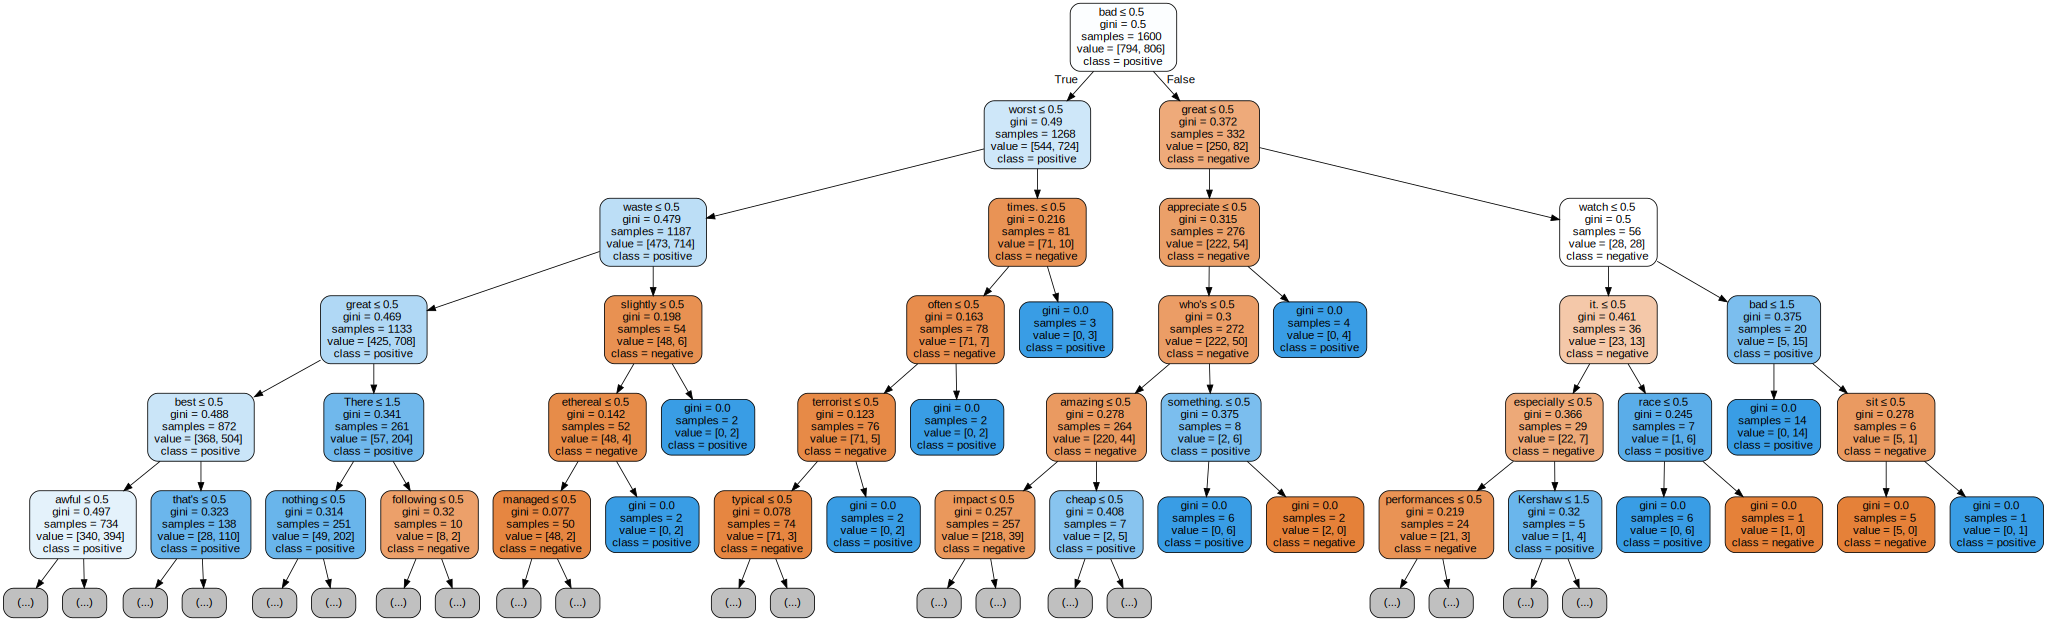

In [31]:
graph

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.69


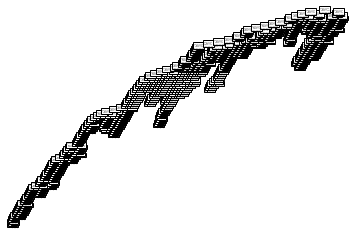

In [33]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

estimator = clf.estimators_[9]

tree.plot_tree(estimator)
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded=True, special_characters=True, max_depth = 5, feature_names=UniqueWords[1:], class_names=["negative", "positive"])  
graph = graphviz.Source(dot_data)  

y_pred=clf.predict(X_test)

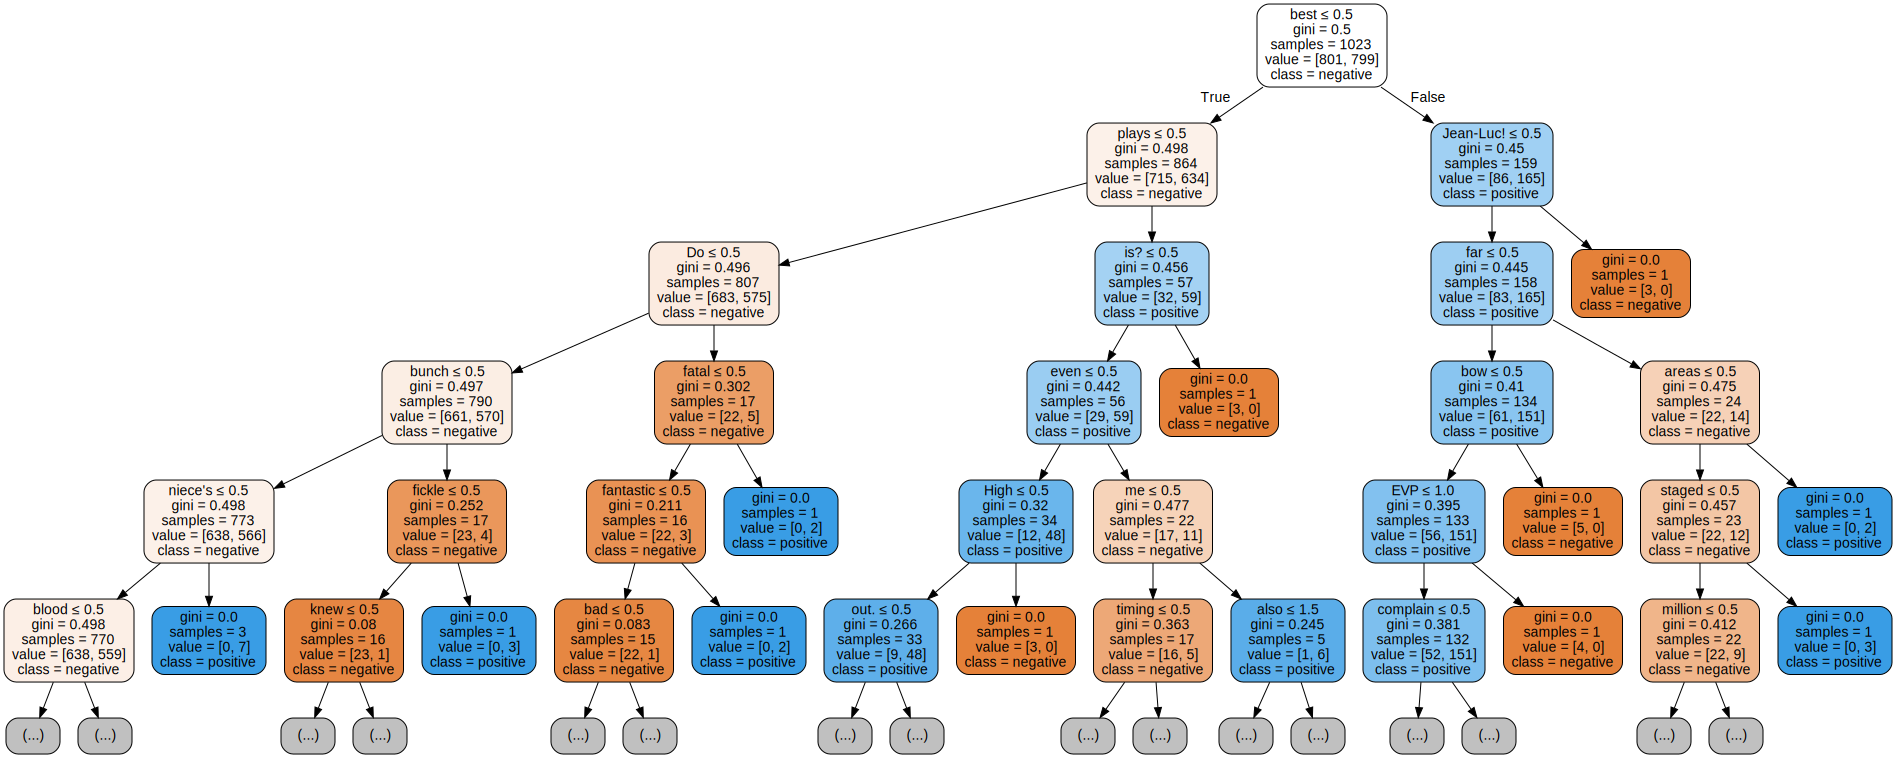

In [34]:
graph

In [35]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.805
